In [1]:
import os
import wave
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
def extract_audio_features(filepath, show_waveform=False):
    with wave.open(filepath, 'rb') as wav_file:
        num_channels = wav_file.getnchannels()
        sample_width = wav_file.getsampwidth()
        frame_rate = wav_file.getframerate()
        num_frames = wav_file.getnframes()
        duration = num_frames / float(frame_rate)

        # Membaca frame audio
        frames = wav_file.readframes(num_frames)
        audio_data = np.frombuffer(frames, dtype=np.int16)

        if num_channels > 1:
            audio_data = np.reshape(audio_data, (-1, num_channels))

        # Jika `show_waveform` diaktifkan, tampilkan waveform
        if show_waveform:
            print("Audio Array:", audio_data)
            print("Array Shape:", audio_data.shape)

            # Visualisasi waveform dari sinyal audio
            plt.figure(figsize=(10, 4))
            if num_channels > 1:
                plt.plot(audio_data[:, 0], color='#D5006D')  # Hanya menampilkan channel pertama
            else:
                plt.plot(audio_data, color='#D5006D')
            plt.title(f'Waveform of the Audio Signal: {os.path.basename(filepath)}')
            plt.xlabel('Sample Number')
            plt.ylabel('Amplitude')
            plt.grid()
            plt.show()

        # Mengembalikan fitur audio dalam bentuk dictionary
        return {
            'Channels': num_channels,
            'Sample Width': sample_width,
            'Frame Rate': frame_rate,
            'Number of Frames': num_frames,
            'Duration': duration
        }

In [3]:
# Path folder audio
folder_path = r'C:/Users/patri/OneDrive/Documents/TUGAS KULIAH/SEMESTER 5/DATA MINING II/heartbeat sounds/set_b'

Audio Array: [-204 -117   90 ...  495  575  594]
Array Shape: (42385,)


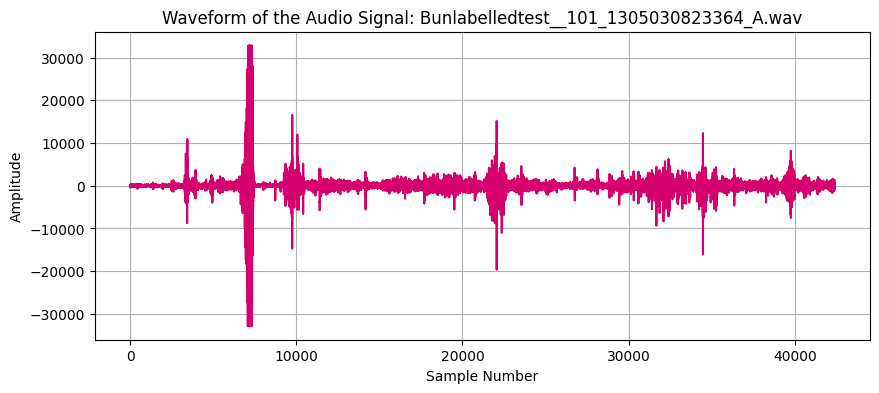

Audio Array: [ -73 -226 -151 ...  121  112  141]
Array Shape: (87107,)


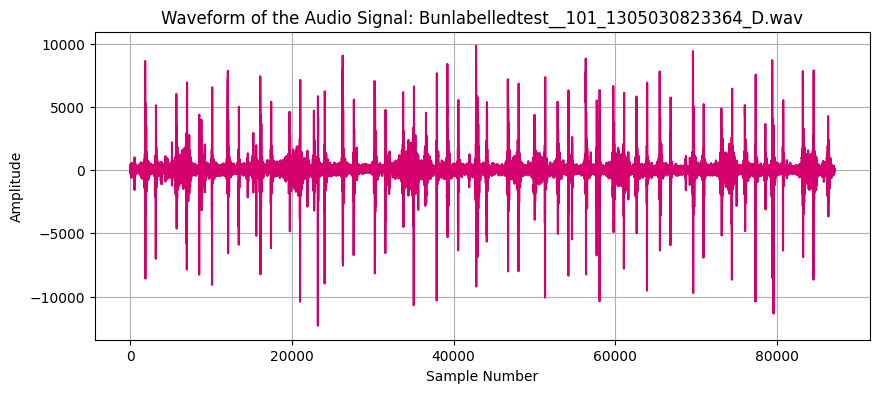

Audio Array: [ 431  298  405 ... -309  -63  -25]
Array Shape: (10647,)


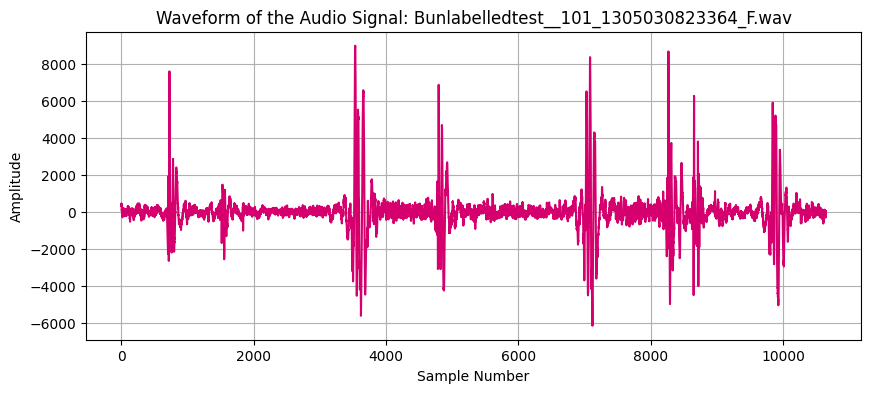

Audio Array: [-529 -447 -415 ... -201 -103   70]
Array Shape: (28899,)


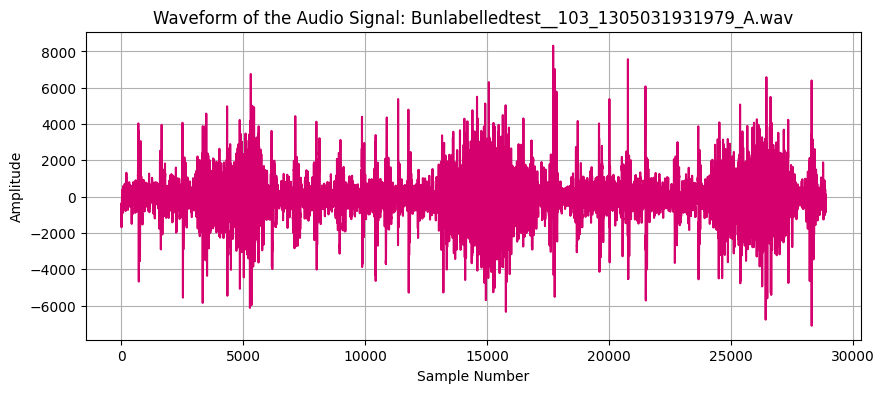

Audio Array: [-2207 -1851 -1105 ...   425   264    95]
Array Shape: (33716,)


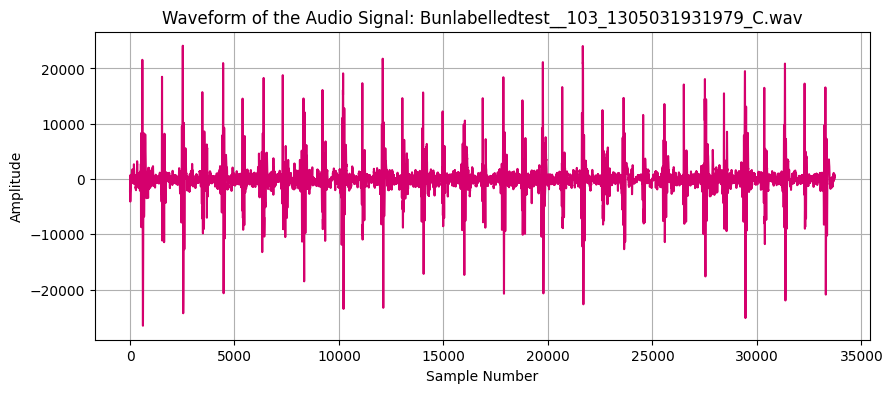

In [4]:
# Ekstrak fitur dari 5 file .wav dan visualisasikan waveformnya
count = 0
for filename in os.listdir(folder_path):
    if filename.endswith('.wav'):
        file_path = os.path.join(folder_path, filename)
        # Ekstraksi fitur dan tampilkan waveform untuk 5 file pertama
        features = extract_audio_features(file_path, show_waveform=True)
        count += 1
        
        # Hentikan setelah menampilkan 5 waveform
        if count >= 5:
            break

In [5]:
audio_features = []
file_names = []
feature_descriptions = []

for filename in os.listdir(folder_path):
    if filename.endswith('.wav'):
        file_path = os.path.join(folder_path, filename)
        features = extract_audio_features(file_path)
        
        if features:
            audio_features.append([
                features['Channels'], 
                features['Sample Width'], 
                features['Frame Rate'], 
                features['Number of Frames'], 
                features['Duration']
            ])
            file_names.append(filename)
            
            feature_descriptions.append(
                f"{filename} - Channels: {features['Channels']}, "
                f"Sample Width: {features['Sample Width']} bytes, "
                f"Frame Rate: {features['Frame Rate']} Hz, "
                f"Number of Frames: {features['Number of Frames']}, "
                f"Duration: {features['Duration']:.2f} seconds"
            )
        else:
            print(f"Error: Gagal mengekstrak fitur dari file {filename}")


In [6]:
audio_features = np.array(audio_features)

In [7]:
print("Shape of audio_features:", audio_features.shape)

Shape of audio_features: (656, 5)


In [8]:
# Pastikan audio_features adalah 2D
if audio_features.ndim == 1:
    audio_features = audio_features.reshape(-1, 1)

In [9]:
# Cek apakah audio_features sudah terisi
print("Jumlah data dalam audio_features:", len(audio_features))
if audio_features.size > 0:
    print("Contoh data pertama:", audio_features[0])
else:
    print("Tidak ada data")

Jumlah data dalam audio_features: 656
Contoh data pertama: [1.000000e+00 2.000000e+00 4.000000e+03 4.238500e+04 1.059625e+01]


In [10]:
# Jika data sudah terisi, lanjutkan standarisasi
if audio_features.size > 0:
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(audio_features)
    print("Data setelah standarisasi:", features_scaled)
else:
    print("Error: Tidak ada data yang bisa distandarisasi.")

Data setelah standarisasi: [[ 0.          0.          0.          0.87179929  0.87179929]
 [ 0.          0.          0.          3.28065548  3.28065548]
 [ 0.          0.          0.         -0.83770113 -0.83770113]
 ...
 [ 0.          0.          0.          0.07328194  0.07328194]
 [ 0.          0.          0.         -0.31646993 -0.31646993]
 [ 0.          0.          0.         -0.24537092 -0.24537092]]


In [11]:
# Menetapkan parameter DBSCAN
eps_value = 0.3 
min_samples_value = 1 

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
labels = dbscan.fit_predict(features_scaled)

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Number of clusters found: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

if n_clusters_ > 1:
    silhouette_avg = silhouette_score(features_scaled, labels)
    print(f'Silhouette Score: {silhouette_avg:.3f}')
else:
    print('Silhouette Score tidak dapat dihitung karena hanya ada satu cluster atau noise.')

Number of clusters found: 3
Estimated number of noise points: 0
Silhouette Score: 0.660


In [12]:
# Visualisasi hasil clustering dengan PCA
pca = PCA(n_components=2)
features_reduced = pca.fit_transform(features_scaled)

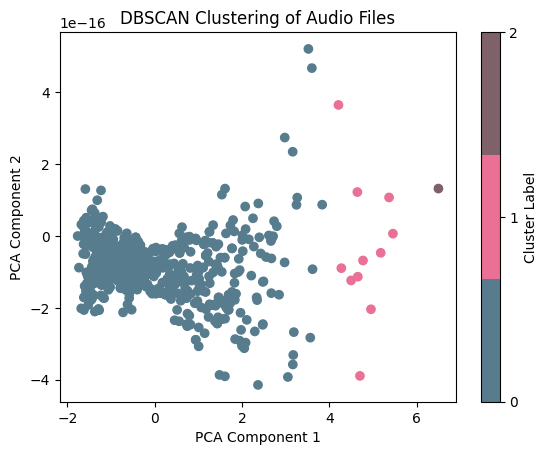

In [13]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

custom_colors = ['#567c8d', '#eb7096', '#7f6269']

colormap = ListedColormap(custom_colors)

plt.scatter(features_reduced[:, 0], features_reduced[:, 1], c=labels, cmap=colormap)
plt.title('DBSCAN Clustering of Audio Files')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.colorbar(label='Cluster Label', ticks=range(len(custom_colors)))

plt.show()


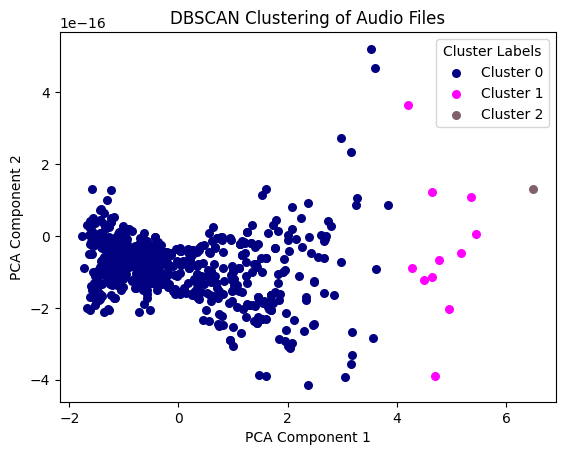

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Pisahkan titik berdasarkan cluster label
unique_labels = np.unique(labels)
colors = ['navy', 'magenta', '#7f6269']  # warna yang sesuai dengan cluster yang terdeteksi

# Plot setiap cluster dengan warna dan label
for i, label in enumerate(unique_labels):
    cluster_points = features_reduced[labels == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                c=colors[i], label=f'Cluster {label}', s=30)

# Tambahkan judul, label sumbu, dan legenda
plt.title('DBSCAN Clustering of Audio Files')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster Labels')  # Legenda dengan judul
plt.show()


In [15]:
for label in range(8):  
    cluster_files = [feature_descriptions[i] for i in range(len(labels)) if labels[i] == label]
    if len(cluster_files) > 0: 
        print(f'Cluster {label}: {len(cluster_files)} files')


Cluster 0: 644 files
Cluster 1: 11 files
Cluster 2: 1 files


In [18]:
cluster_durations = {}

for label in set(labels):
    cluster_files = [feature_descriptions[i] for i in range(len(labels)) if labels[i] == label]
    print(f'\nCluster {label}: {len(cluster_files)} files')

    durations = [float(file_desc.split(', ')[-1].split(' ')[1]) for file_desc in cluster_files]
    cluster_durations[label] = durations

    for file_desc in cluster_files[:5]:  # Menampilkan 5 file pertama
        print(f'  {file_desc}')

    if len(cluster_files) > 5:
        print(f'  ...and {len(cluster_files) - 5} more files.')


Cluster 0: 644 files
  Bunlabelledtest__101_1305030823364_A.wav - Channels: 1, Sample Width: 2 bytes, Frame Rate: 4000 Hz, Number of Frames: 42385, Duration: 10.60 seconds
  Bunlabelledtest__101_1305030823364_F.wav - Channels: 1, Sample Width: 2 bytes, Frame Rate: 4000 Hz, Number of Frames: 10647, Duration: 2.66 seconds
  Bunlabelledtest__103_1305031931979_A.wav - Channels: 1, Sample Width: 2 bytes, Frame Rate: 4000 Hz, Number of Frames: 28899, Duration: 7.22 seconds
  Bunlabelledtest__103_1305031931979_C.wav - Channels: 1, Sample Width: 2 bytes, Frame Rate: 4000 Hz, Number of Frames: 33716, Duration: 8.43 seconds
  Bunlabelledtest__105_1305033453095_B.wav - Channels: 1, Sample Width: 2 bytes, Frame Rate: 4000 Hz, Number of Frames: 40184, Duration: 10.05 seconds
  ...and 639 more files.

Cluster 1: 11 files
  Bunlabelledtest__101_1305030823364_D.wav - Channels: 1, Sample Width: 2 bytes, Frame Rate: 4000 Hz, Number of Frames: 87107, Duration: 21.78 seconds
  Bunlabelledtest__108_130565

In [20]:
for label, durations in cluster_durations.items():
    if durations:
        min_duration = min(durations)
        max_duration = max(durations)
        print(f'Cluster {label} Durasi: {min_duration} - {max_duration} detik')

Cluster 0 Durasi: 0.76 - 19.13 detik
Cluster 1 Durasi: 20.36 - 24.45 detik
Cluster 2 Durasi: 27.87 - 27.87 detik


In [43]:
from mpl_toolkits.mplot3d import Axes3D  # Import untuk visualisasi 3D
import seaborn as sns

# Lakukan PCA untuk mengurangi dimensi menjadi 3 komponen
pca = PCA(n_components=3)
features_reduced_3d = pca.fit_transform(features_scaled)

# Membuat palet warna menggunakan seaborn
palette = sns.color_palette("viridis", n_colors=num_clusters)
cluster_colors = [palette[label] if label != -1 else (0.5, 0.5, 0.5) for label in labels]  # Warna abu-abu untuk noise (-1)

# Plot hasil clustering dalam 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot scatter 3D
sc = ax.scatter(features_reduced_3d[:, 0], features_reduced_3d[:, 1], features_reduced_3d[:, 2], c=cluster_colors)

# Menambahkan label dan judul
ax.set_title('3D DBSCAN Clustering of Audio Files')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Menambahkan color bar untuk label cluster
plt.colorbar(sc, label='Cluster Label')

plt.show()

# Menampilkan hasil clustering dan nama file yang terkait
for label in set(labels):
    cluster_files = [feature_descriptions[i] for i in range(len(labels)) if labels[i] == label]
    print(f'\nCluster {label}: {len(cluster_files)} files')

    # Tampilkan hanya beberapa file pertama dari setiap cluster sebagai contoh
    for file_desc in cluster_files[:5]:  # Menampilkan 5 file pertama
        print(f'  {file_desc}')
    
    if len(cluster_files) > 5:
        print(f'  ...and {len(cluster_files) - 5} more files.')

NameError: name 'num_clusters' is not defined